<a href="https://colab.research.google.com/github/Sajrudin/GNCIPL_Internship/blob/main/Week3_Project_Email_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title**: Email Spam Detection System

**Project  : Email-Spam Detection**

**Domain : NLP**

**Presented By : Sajrudin Aalam**

---


# Project Summary
This project focused on building a machine learning system to classify emails as spam or not spam with high reliability. Multiple machine learning models were trained and evaluated, including SVC, KNN, Naive Bayes, Decision Tree, Logistic Regression, Random Forest, Bagging Classifier, Extra Trees Classifier, and XGBoost.

The models were compared based on Accuracy, Precision, and Recall to ensure that the selected solution not only predicts correctly but also minimizes false positives (legitimate emails marked as spam) and false negatives (spam emails that bypass detection).

**Project Objective**: To develop and implement a machine learning model capable of accurately classifying incoming emails as either "spam" or "not spam" (ham). The primary goal is to minimize false positives (legitimate emails marked as spam) and false negatives (spam emails reaching the inbox), thereby enhancing user security and improving email management efficiency.

The following codes tell whether the email is spam or not.


*   0 -> Ham / Not Spam
*   1 -> Spam



# Coding Section

In [61]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
%matplotlib inline

# Importing WordCloud for text visualization
from wordcloud import WordCloud

# Importing NLTK for natural language processing
import nltk
from nltk.corpus import stopwords    # For stopwords
from nltk.stem import PorterStemmer
import string

# Downloading NLTK data
nltk.download('stopwords')   # Downloading stopwords data
nltk.download('punkt')       # Downloading tokenizer data
nltk.download('punkt_tab')
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [12]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = "/content/drive/MyDrive/GNCIPL_Internship_Projects/spam_ham_dataset.csv"
data = pd.read_csv(path)

Mounted at /content/drive


In [13]:
#Creating a copy of the data
df = data.copy()

#Displaying the first 5 rows
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [14]:
# Displaying the shape of the data
print(df.shape)

#Displaying the columns of the data
print(df.columns)

#Displaying the data types of the columns
print(df.dtypes)

(5171, 4)
Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')
Unnamed: 0     int64
label         object
text          object
label_num      int64
dtype: object


# Data Overview 📊

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [16]:
df.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


In [17]:
# Checking the missing values
df.isnull().sum()

,0
Unnamed: 0,0
label,0
text,0
label_num,0


# Data Cleaning

In [19]:
# Removing the label column as we have label_num
# 0 -> Ham
# 1 -> Spam

df = df.drop(['Unnamed: 0','label'], axis=1)

df.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [20]:
# Renaming the columns
df = df.rename(columns={'label_num':'target'})

df.head()

,text,target
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [22]:
# Shape of the data
df.shape

(5171, 2)

In [21]:
# Checking Duplicates
df.duplicated().sum()

np.int64(178)

In [23]:
# Removing duplicates keeping only the first copy
df = df.drop_duplicates(keep='first')

df.shape

(4993, 2)

# Performing EDA

In [25]:
# Checking the percentage of the Ham and Spam messages
values = df['target'].value_counts()
total = values.sum()

ham_percentage = (values[0] / total) * 100
spam_percentage = (values[1] / total) * 100

print(f"Ham Percentage: {ham_percentage:.2f}%")
print(f"Spam Percentage: {spam_percentage:.2f}%")

Ham Percentage: 70.72%
Spam Percentage: 29.28%


In [35]:
# Plotting the Ham/ Spam Percentage
labels = ['ham', 'spam']

# Create an interactive pie chart
fig = px.pie(
    names=labels,
    values=values,
    title="Email Classification",
    color=labels,
    color_discrete_map={'ham': '#FF5733', 'spam': '#33FF57'},
    hole=0
)

# Customize layout
fig.update_traces(
    textinfo='percent+label',
    pull=[0, 0.1],  # "explode" the second slice
)

fig.update_layout(
    title_font=dict(size=24, family='Arial', color='black'),
    showlegend=True
)

fig.show()

# Text Analysis

In [38]:
# Counting the  words and sentences in the text column
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [39]:
df.head()

,text,target,num_characters,num_words,num_sentence
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24
3,"Subject: photoshop , windows , office . cheap ...",1,414,49,3
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3


In [40]:
df.describe()

,target,num_characters,num_words,num_sentence
count,4993.000000,4993.000000,4993.000000,4993.000000
mean,0.292810,1069.426397,233.678149,13.386942
std,0.455098,1547.863387,340.702932,27.959959
min,0.000000,11.000000,2.000000,1.000000
25%,0.000000,256.000000,55.000000,4.000000
50%,0.000000,557.000000,125.000000,7.000000
75%,1.000000,1262.000000,288.000000,15.000000
max,1.000000,32258.000000,8863.000000,1204.000000


# Summary Statistics of Ham and Spam Data

In [43]:
# Statistics summary of the Ham Data
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,3531.000000,3531.000000,3531.000000
mean,994.939394,230.516001,11.662419
std,1402.785831,337.018933,25.330035
min,18.000000,3.000000,1.000000
25%,241.000000,53.000000,4.000000
50%,538.000000,128.000000,7.000000
75%,1253.500000,298.500000,13.500000
max,32258.000000,8863.000000,1204.000000


In [44]:
# Statistics summary of the Spam Data
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,1462.000000,1462.000000,1462.000000
mean,1249.326265,241.315321,17.551984
std,1840.112883,349.439381,33.111447
min,11.000000,2.000000,1.000000
25%,304.250000,60.000000,4.000000
50%,589.000000,119.500000,9.000000
75%,1305.000000,252.750000,19.000000
max,22073.000000,3963.000000,693.000000


# Character Length Distribution for Legitimate and Spam Messages

In [51]:
# Split by target
group0 = df[df['target'] == 0]['num_characters']
group1 = df[df['target'] == 1]['num_characters']

fig = ff.create_distplot(
    [group0, group1],
    group_labels=['Target 0', 'Target 1'],
    show_hist=False,  # No bars, just smooth curve
    colors=['blue', 'red']
)

fig.update_layout(
    title="Distribution of Number of Characters by Target (KDE Curve)",
    xaxis_title="Number of Characters",
    yaxis_title="Density"
)

fig.show()


 # Word Count Distribution for Legitimate and Spam Messages

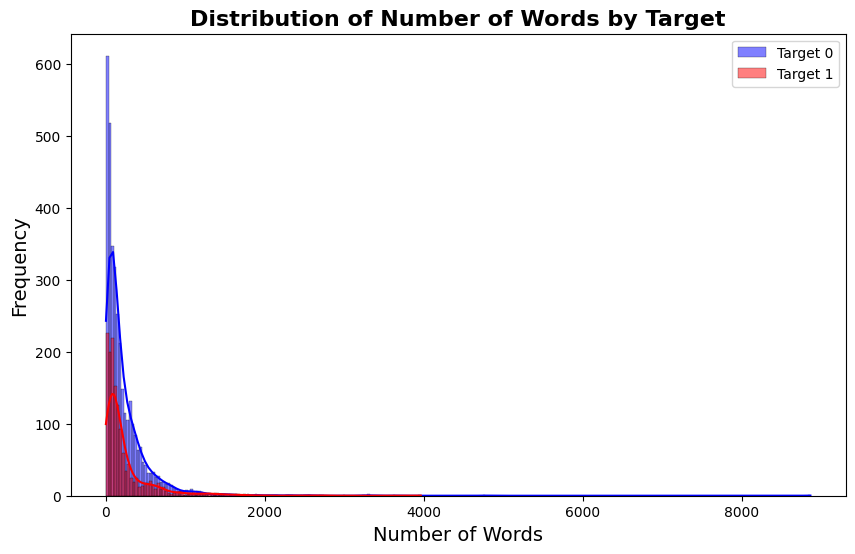

In [52]:
plt.figure(figsize=(10, 6))

# Plot the histogram for target 0 in blue
sns.histplot(df[df['target'] == 0]['num_words'], color='blue', label='Target 0', kde=True)

# Plot the histogram for target 1 in red
sns.histplot(df[df['target'] == 1]['num_words'], color='red', label='Target 1', kde=True)

# Add labels and a title
plt.xlabel('Number of Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Words by Target', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style='whitegrid')  # Add a white grid background

plt.show()

#Pairplot for Data Visualization

In [56]:
numeric_cols = ['num_characters', 'num_words', 'num_sentence']

fig = px.scatter_matrix(
    df,
    dimensions=numeric_cols,
    color='target',  # Different colors for target 0/1
    color_discrete_map={0: 'blue', 1: 'red'},
    title="Interactive Pairplot of Text Features"
)

# Improve marker size and layout
fig.update_traces(diagonal_visible=True, marker=dict(size=4, opacity=0.6))
fig.update_layout(
    title_font=dict(size=18, family='Arial', color='black'),
    height=800,
)

fig.show()

#  Coorelation | Heatmap

In [59]:
numeric_cols = ['num_characters', 'num_words', 'num_sentence','target']

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Create interactive heatmap
fig = px.imshow(
    corr_matrix,
    text_auto=True,  # Showing correlation values inside the cells
    color_continuous_scale='RdBu',
    title="Interactive Correlation Heatmap of Text Features"
)

# Update layout for better readability
fig.update_layout(
    title_font=dict(size=18, family='Arial', color='black'),
    xaxis_title="Features",
    yaxis_title="Features",
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    width=1000,
    height=600
)

fig.show()

# Data Preprocessing

In [62]:
ps = PorterStemmer()

# Creating a text preprocessing pipeline that prepares raw text for machine learning/NLP tasks.

def transform_text(text):
    # 1. Lowercase
    text = text.lower()

    # 2. Tokenize
    tokens = nltk.word_tokenize(text)

    # 3. Filter: keep only alphanumeric tokens and remove stopwords/punctuation
    stop_words = set(stopwords.words('english'))
    tokens = [t for t in tokens if t.isalnum() and t not in stop_words]

    # 4. Stem words
    tokens = [ps.stem(t) for t in tokens]

    # 5. Join back into a single string
    return " ".join(tokens)

In [63]:
# Applying the transform_text function to Create a new column

df['transformed_text'] = df['text'].apply(transform_text)

In [64]:
df.head()

,text,target,num_characters,num_words,num_sentence,transformed_text
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3,subject enron methanol meter 988291 follow not...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3,subject hpl nom januari 9 2001 see attach file...
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24,subject neon retreat ho ho ho around wonder ti...
3,"Subject: photoshop , windows , office . cheap ...",1,414,49,3,subject photoshop window offic cheap main tren...
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3,subject indian spring deal book teco pvr reven...


# Word Cloud for Spam Messages & Ham Messages

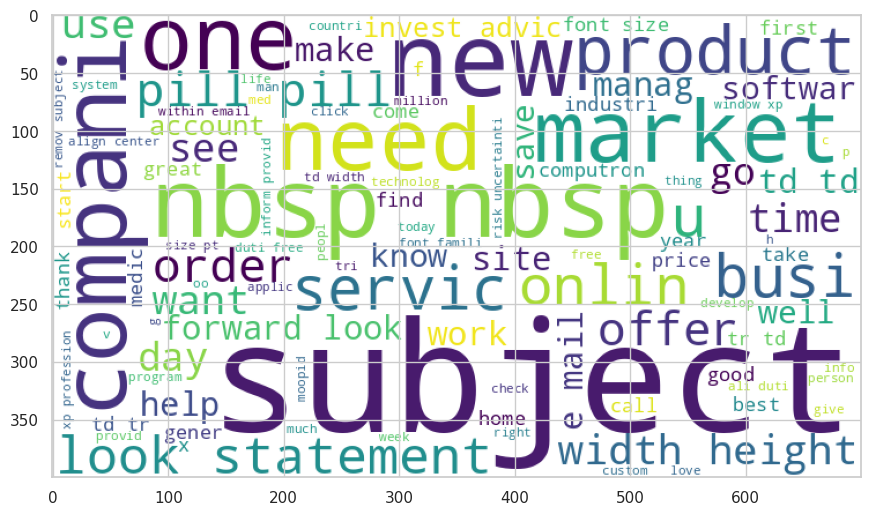

In [67]:
# Spam Message Word Cloud
wc = WordCloud(width = 700, height = 400, min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)
plt.show()

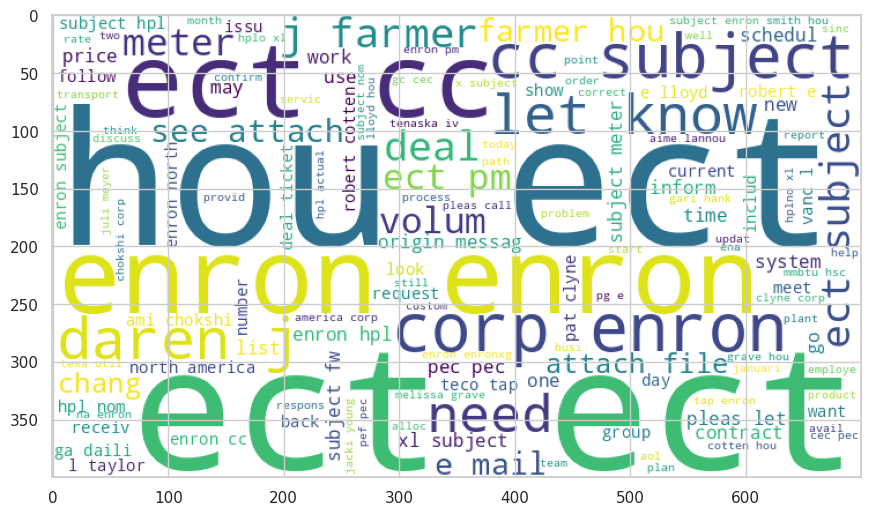

In [68]:
# Ham Message Word Cloud
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)
plt.show()


# Classifier Model Devlopment

In [78]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score

In [72]:
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features = 3000)

In [71]:
X = tfid.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

In [73]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

In [87]:
svc = SVC(kernel= "sigmoid", gamma  = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2 )
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
xgb  = XGBClassifier(n_estimators = 50, random_state = 2)


In [89]:
clfs = {
    'SVC': svc,
    'KNN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'Bgc': bc,
    'ETC': etc,
    'xgb': xgb

}

In [90]:
def train_classifier(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision


In [91]:
accuracy_scores = []
precision_scores = []
recall_scores = []
model_names = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    y_pred = clf.predict(X_test)
    current_recall = recall_score(y_test, y_pred)

    model_names.append(name)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)


In [93]:
results_df = pd.DataFrame({
    "Model": model_names,
    "Accuracy": accuracy_scores,
    "Precision": precision_scores,
    "Recall": recall_scores
})

# Make interactive table with Plotly
fig = go.Figure(data=[go.Table(
    header=dict(values=list(results_df.columns),
                fill_color='black',
                font=dict(color='white', size=14),
                align='center'),
    cells=dict(values=[results_df["Model"], results_df["Accuracy"], results_df["Precision"], results_df["Recall"]],
               fill_color=[['#f9f9f9', '#e3f2fd'] * (len(results_df)//2 + 1)],  # alternating row colors
               align='center',
               format=[None, ".2%", ".2%", ".2%"],
               font=dict(size=13))
)])

fig.update_layout(
    title="📊 Model Performance Comparison",
    title_x=0.5,
    title_font=dict(size=20, color="darkblue"),
    width=1000,
    height=450
)

fig.show()

# Conclusion

The experimental results indicate that Support Vector Classifier (SVC) is the most effective model for this task, achieving 98.10% accuracy, 96.39% precision, and 97.35% recall. This balance ensures that the system catches most spam emails while keeping false positives to a minimum, providing a reliable user experience.

Overall, this project successfully demonstrates how machine learning can be applied to real-world problems like email filtering. The results suggest that SVC (or similar ensemble models like Extra Trees Classifier) can be confidently deployed in a production environment for robust spam detection. Future improvements may include hyperparameter tuning, model ensembling, and integration with real-time email pipelines to further optimize performance.